# Analyzing  911 call data 
from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
data=pd.read_csv('911.csv')

## Viewing the Table:

In [3]:
data.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
data.dtypes

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
dtype: object

## Analyzing the Data:

#### Analyzing the "Title" column

In [6]:
len(data['title'].unique())

110

In [7]:
data['title'].value_counts()

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
                               ...  
EMS: BOMB DEVICE FOUND             1
EMS: DISABLED VEHICLE              1
EMS: PLANE CRASH                   1
Fire: DIABETIC EMERGENCY           1
Fire: UNCONSCIOUS SUBJECT          1
Name: title, Length: 110, dtype: int64

#### Breaking the "title" column down in 2 parts and Visualizing the data

In [8]:
categ=data['title'].str.split(":", n=1 , expand=True)
data['Category']=categ[0].str.upper()
data.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Category
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,FIRE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [9]:
data['Category'].value_counts()

EMS        48877
TRAFFIC    35695
FIRE       14920
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

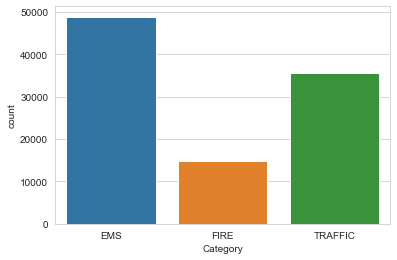

In [10]:
sns.countplot(x='Category', data=data)

#### Analyzing the Zip codes with the highest number of calls:

In [11]:
data['zip'].value_counts().head(10)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64

<AxesSubplot:xlabel='zip', ylabel='count'>

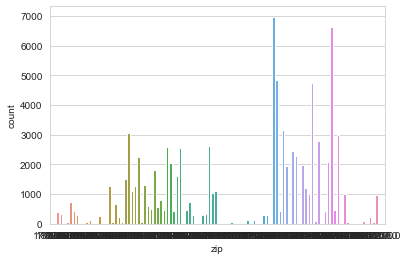

In [12]:
sns.countplot(x='zip', data=data)

#### Analyzing the Townships in the 911 calls 

In [13]:
data['twp'].value_counts().head(10)

LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
PLYMOUTH            3158
HORSHAM             3003
Name: twp, dtype: int64

#### Analyzing the TimeStamp Column

In [14]:
data['timeStamp'].dtypes

dtype('O')

##### changing the above object type to a timestamp:

In [15]:
data['timeStamp']=pd.to_datetime(data['timeStamp'])

In [16]:
data.dtypes

lat                 float64
lng                 float64
desc                 object
zip                 float64
title                object
timeStamp    datetime64[ns]
twp                  object
addr                 object
e                     int64
Category             object
dtype: object

#### Creating new columns off  timestamp

In [17]:
data['hour']=data['timeStamp'].apply(lambda time:time.hour)
data['Month']=data['timeStamp'].apply(lambda time:time.month)
data['Day of Week']=data['timeStamp'].apply(lambda time:time.dayofweek)

In [18]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['Day of Week']=data['Day of Week'].map(dmap)

In [19]:
data.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Category,hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,FIRE,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


#### Analyzing Weely Data

In [20]:
data['Day of Week'].value_counts()

Tue    15150
Wed    14879
Fri    14833
Mon    14680
Thu    14478
Sat    13336
Sun    12136
Name: Day of Week, dtype: int64

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

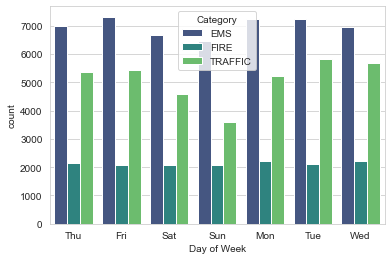

In [21]:
sns.countplot(x='Day of Week', data=data,hue='Category',palette='viridis')

#### Analyzing Monthly Data:

In [22]:
dmon = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
data['Month Names']=data['Month'].map(dmon)

<AxesSubplot:xlabel='Month Names', ylabel='count'>

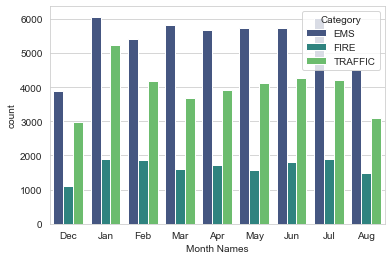

In [23]:
sns.countplot(x='Month Names', data=data,hue='Category',palette='viridis')

In [24]:
data['Month Names'].value_counts()

Jan    13205
Jul    12137
Jun    11786
Feb    11467
May    11423
Apr    11326
Mar    11101
Aug     9078
Dec     7969
Name: Month Names, dtype: int64

********Missin Months: Sep, Oct and Nov. Trying to fill this data

In [25]:
mnt=data.groupby('Month').count()
mnt.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Category,hour,Day of Week,Month Names
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


Monthly Counts:

<AxesSubplot:xlabel='Month'>

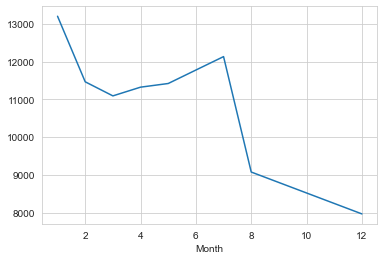

In [26]:
mnt['twp'].plot()

linear fit on the number of calls per month:

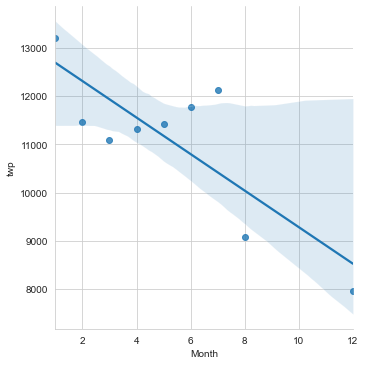

In [28]:
sns.lmplot(x='Month',y='twp',data=mnt.reset_index())

#### Adding a new column for Date and analyzing the counts by Date:

In [29]:
data['Date']=data['timeStamp'].apply(lambda t:t.date())
data.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Category,hour,Month,Day of Week,Month Names,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,Dec,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,Dec,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,FIRE,17,12,Thu,Dec,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,Dec,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,Dec,2015-12-10


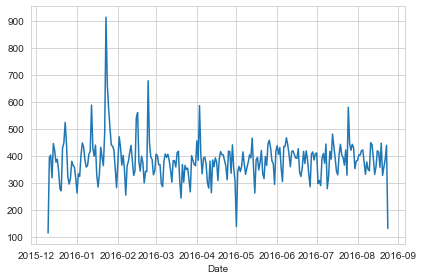

In [30]:
data.groupby('Date').count()['twp'].plot()
plt.tight_layout()

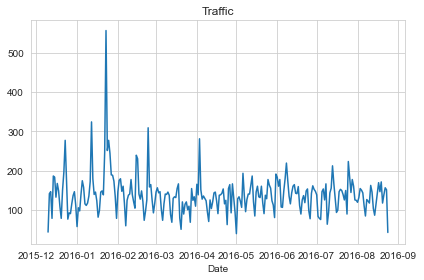

In [31]:
data[data['Category']=='TRAFFIC'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

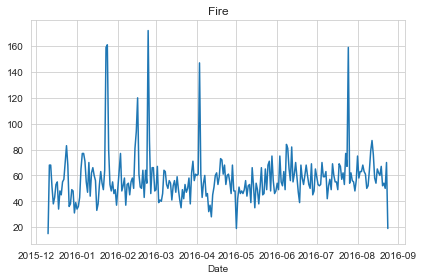

In [32]:
data[data['Category']=='FIRE'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

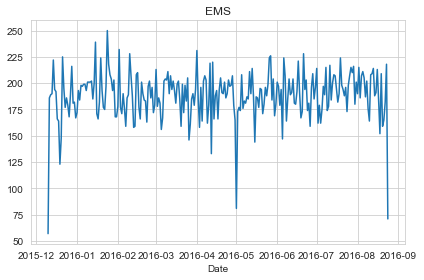

In [33]:
data[data['Category']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

#### Analyzing Weekly and Hourly Data

In [34]:
busyhrs=data.groupby(by=['Day of Week','hour']).count()['Category'].unstack()
busyhrs.head(5)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='hour', ylabel='Day of Week'>

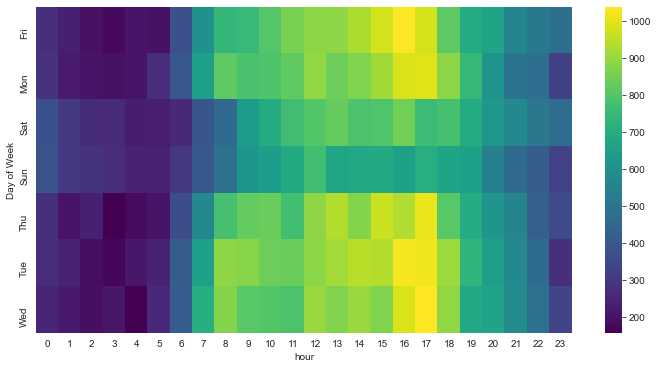

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(busyhrs,cmap='viridis')

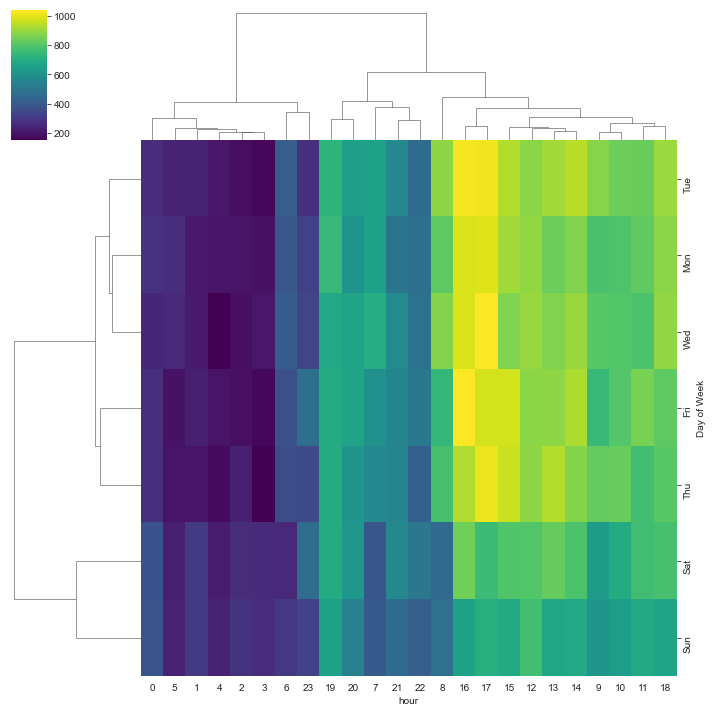

In [36]:
sns.clustermap(busyhrs,cmap='viridis' )

#### Analyzing Monthly and Hourly Data

In [37]:
busymnt=data.groupby(by=['Day of Week','Month']).count()['Category'].unstack()
busymnt.head(5)

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

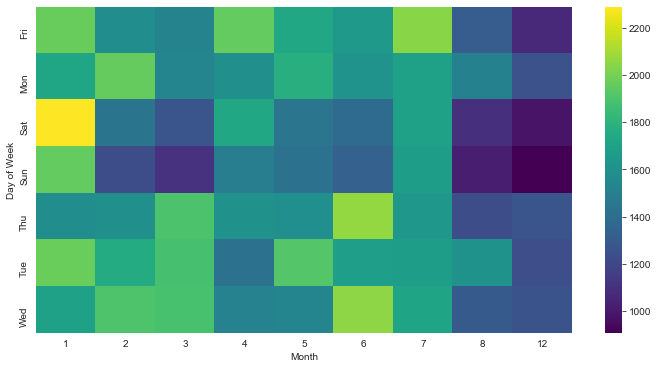

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(busymnt, cmap='viridis')

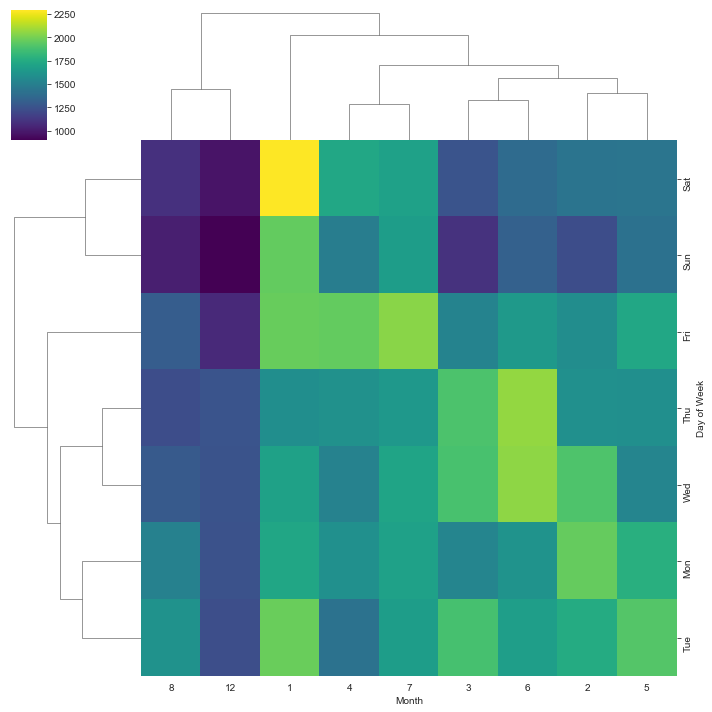

In [39]:
sns.clustermap(busymnt, cmap='viridis')